In [30]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler

bank_marketing = pd.read_csv('data/raw/bank-additional-full.csv', sep=";")

In [31]:
bank_marketing

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Preprocessing

In [32]:
# Drop all rows with an unknown value
no_unknowns = bank_marketing[
    (bank_marketing['job'] != 'unknown') &
    (bank_marketing['marital'] != 'unknown') &
    (bank_marketing['education'] != 'unknown') &
    (bank_marketing['default'] != 'unknown') &
    (bank_marketing['housing'] != 'unknown') &
    (bank_marketing['loan'] != 'unknown')
].reset_index(drop=True)

no_unknowns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


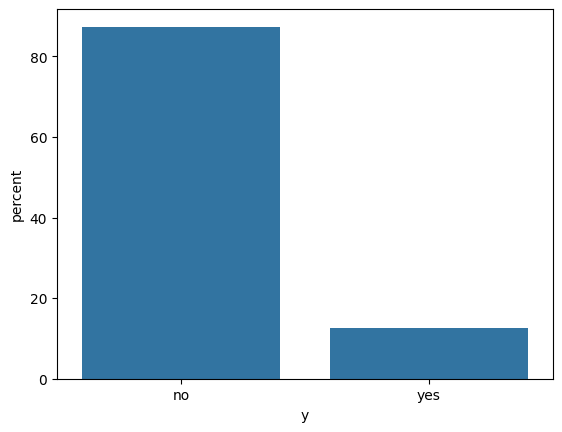

In [33]:
sns.countplot(data=no_unknowns, x='y', stat='percent');

In [34]:
no_unknowns['y'].value_counts()

y
no     26629
yes     3859
Name: count, dtype: int64

In [35]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [36]:
days = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4
}

months = {
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

married = {
    'divorced': 0,
    'single': 1,
    'married': 2
}

poutcome = {
    'nonexistent': -1,
    'failure': 0,
    'success': 1
}

In [37]:
no_unknowns = no_unknowns.replace(days).infer_objects(copy=False)
no_unknowns = no_unknowns.replace(months).infer_objects(copy=False)
no_unknowns = no_unknowns.replace(married).infer_objects(copy=False)
no_unknowns = no_unknowns.replace(poutcome).infer_objects(copy=False)

C:\Users\Peti Vlaskovits\AppData\Local\Temp\ipykernel_10212\3774457650.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  no_unknowns = no_unknowns.replace(days).infer_objects(copy=False)
C:\Users\Peti Vlaskovits\AppData\Local\Temp\ipykernel_10212\3774457650.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  no_unknowns = no_unknowns.replace(months).infer_objects(copy=False)
C:\Users\Peti Vlaskovits\AppData\Local\Temp\ipykernel_10212\3774457650.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [38]:
no_unknowns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,2,basic.4y,no,no,no,telephone,5,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,2,high.school,no,yes,no,telephone,5,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,2,basic.6y,no,no,no,telephone,5,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,2,high.school,no,no,yes,telephone,5,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,2,professional.course,no,no,no,telephone,5,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,2,professional.course,no,yes,no,cellular,11,4,...,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,2,professional.course,no,no,no,cellular,11,4,...,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,2,university.degree,no,yes,no,cellular,11,4,...,2,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,2,professional.course,no,no,no,cellular,11,4,...,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [39]:
numeric_only = no_unknowns.select_dtypes(include=['number'])
numeric_only

,age,marital,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,2,5,0,261,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
1,37,2,5,0,226,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
2,40,2,5,0,151,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
3,56,2,5,0,307,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
4,59,2,5,0,139,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,2,11,4,334,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6
30484,46,2,11,4,383,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6
30485,56,2,11,4,189,2,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6
30486,44,2,11,4,442,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6


In [40]:
object_only = no_unknowns.select_dtypes(include=['object']).drop(columns=['y'])
y = no_unknowns['y']
object_only

,job,education,default,housing,loan,contact
0,housemaid,basic.4y,no,no,no,telephone
1,services,high.school,no,yes,no,telephone
2,admin.,basic.6y,no,no,no,telephone
3,services,high.school,no,no,yes,telephone
4,admin.,professional.course,no,no,no,telephone
...,...,...,...,...,...,...
30483,retired,professional.course,no,yes,no,cellular
30484,blue-collar,professional.course,no,no,no,cellular
30485,retired,university.degree,no,yes,no,cellular
30486,technician,professional.course,no,no,no,cellular


In [41]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 1, 0])

In [42]:
encoded_df = pd.DataFrame()
encoded_df[object_only.columns] = oe.fit_transform(object_only)
encoded_df

,job,education,default,housing,loan,contact
0,3.0,0.0,0.0,0.0,0.0,1.0
1,7.0,3.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,7.0,3.0,0.0,0.0,1.0,1.0
4,0.0,5.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
30483,5.0,5.0,0.0,1.0,0.0,0.0
30484,1.0,5.0,0.0,0.0,0.0,0.0
30485,5.0,6.0,0.0,1.0,0.0,0.0
30486,9.0,5.0,0.0,0.0,0.0,0.0


In [43]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [44]:
X = numeric_only.join(encoded_df)
X

,age,marital,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,education,default,housing,loan,contact
0,56,2,5,0,261,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,3.0,0.0,0.0,0.0,0.0,1.0
1,37,2,5,0,226,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,7.0,3.0,0.0,1.0,0.0,1.0
2,40,2,5,0,151,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0.0,1.0,0.0,0.0,0.0,1.0
3,56,2,5,0,307,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,7.0,3.0,0.0,0.0,1.0,1.0
4,59,2,5,0,139,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0.0,5.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,2,11,4,334,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,5.0,5.0,0.0,1.0,0.0,0.0
30484,46,2,11,4,383,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,1.0,5.0,0.0,0.0,0.0,0.0
30485,56,2,11,4,189,2,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,5.0,6.0,0.0,1.0,0.0,0.0
30486,44,2,11,4,442,1,999,0,-1,-1.1,94.767,-50.8,1.028,4963.6,9.0,5.0,0.0,0.0,0.0,0.0


In [45]:
X.to_csv('data/cleaned_data.csv', index=False);

## Machine Learning

In [46]:
random_state = 42
cv = 5

In [47]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=random_state)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y)

In [48]:
ros = RandomOverSampler(random_state=random_state)
train_X_os, train_y_os = ros.fit_resample(train_X, train_y)

In [49]:
pd.Series(train_y_os).value_counts()

0    16012
1    16012
Name: count, dtype: int64

### Candidate models

In [50]:
tree = DecisionTreeClassifier(random_state=random_state)
forest = RandomForestClassifier(random_state=random_state, oob_score=f1_score)
neighbors = KNeighborsClassifier()

tree.fit(train_X, train_y)
forest.fit(train_X, train_y)
neighbors.fit(train_X, train_y)

KNeighborsClassifier()

In [51]:
forest.oob_score_

0.5772076961026147

### Hyperparameter tuning

In [52]:
tree_params = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 5, 10, 15, 20, 25],
    'max_leaf_nodes': [None, 2, 5, 8, 10, 12]
}

In [53]:
tree_search = RandomizedSearchCV(tree, tree_params, error_score='raise', scoring='f1', random_state=random_state)
tree_search.fit(train_X, train_y)

RandomizedSearchCV(error_score='raise',
                   estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25],
                                        'max_leaf_nodes': [None, 2, 5, 8, 10,
                                                           12],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             25],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25]},
                   random_state=42, scoring='f1')

In [54]:
tree_search.best_score_

0.5933383532183052

In [55]:
forest_params = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 5, 10, 15, 20, 25],
    'max_leaf_nodes': [None, 2, 5, 8, 10, 12],
    'n_estimators': [100, 150, 200, 250, 300, 350, 400]
}

In [56]:
forest_search = RandomizedSearchCV(forest, forest_params, error_score='raise', scoring='f1', random_state=random_state)
forest_search.fit(train_X, train_y)

RandomizedSearchCV(error_score='raise',
                   estimator=RandomForestClassifier(oob_score=<function f1_score at 0x00000261D3A48180>,
                                                    random_state=42),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25],
                                        'max_leaf_nodes': [None, 2, 5, 8, 10,
                                                           12],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             25],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=42, scoring='f1')

In [57]:
forest_search.best_score_

0.49827619470788964

In [58]:
forest_search.best_estimator_.oob_score_

0.5018120992472819

In [59]:
neighbors_params = {
    'n_neighbors': [i for i in range(1, 30)]
}

In [60]:
neighbors_search = GridSearchCV(neighbors, neighbors_params, error_score='raise', scoring='f1')
neighbors_search.fit(train_X, train_y)

GridSearchCV(error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='f1')

In [61]:
neighbors_search.best_score_

0.5619436869490269

### Final evaluation

In [62]:
tree_search.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 25,
 'max_leaf_nodes': 12,
 'max_depth': 15}

In [ ]:
tree = DecisionTreeClassifier(
    min_samples_split=20,
    min_samples_leaf=25,
    max_leaf_nodes=None,
    max_depth=10
)
model.fit(train_X_os, train_y_os)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=20)

In [ ]:
tree_val = tree.predict(val_X)
f1_score(val_y, tree_val)

0.57996632996633

In [ ]:
pred_tree_y = tree.predict(test_X)

In [66]:
tree_score = f1_score(test_y, pred_y)
print(tree_score)

0.6167400881057269


In [67]:
forest_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 25,
 'max_leaf_nodes': None,
 'max_depth': 20}

In [83]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=25, random_state=random_state, max_leaf_nodes=None, max_depth=20, oob_score=f1_score)
model.fit(train_X_os, train_y_os)

RandomForestClassifier(max_depth=20, min_samples_leaf=25, min_samples_split=5,
                       oob_score=<function f1_score at 0x00000261D3A48180>,
                       random_state=42)

In [84]:
val_pred = model.predict(val_X)
f1_score(val_y, val_pred)

0.6194995685936152

In [85]:
pred_y = model.predict(test_X)

In [86]:
forest_score = f1_score(test_y, pred_y)
forest_score

0.625

In [71]:
neighbors_search.best_params_

{'n_neighbors': 25}

In [87]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(train_X_os, train_y_os)

KNeighborsClassifier(n_neighbors=25)

In [90]:
val_pred = model.predict(val_X)
f1_score(val_y, val_pred)

0.5750209555741828

In [88]:
pred_y = model.predict(test_X)

In [89]:
neighbors_score = f1_score(test_y, pred_y)
neighbors_score

0.5780008364700961

In [75]:
score_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNeighbors'],
    'Hyperparameter Tuning Scores': [tree_search.best_score_, forest_search.best_score_, neighbors_search.best_score_],
    'Test Set Scores': [tree_score, forest_score, neighbors_score]
})

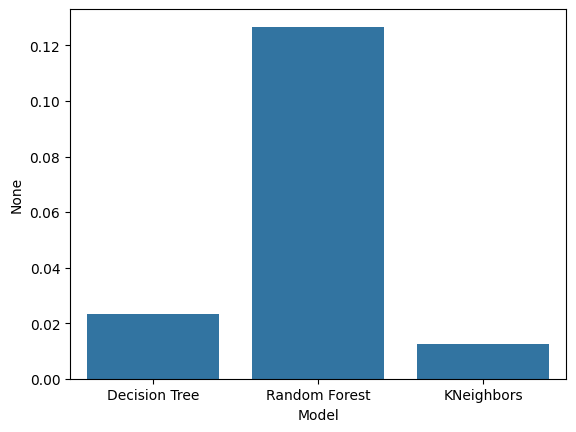

In [76]:
sns.barplot(data=score_comparison, x='Model', y=(score_comparison['Test Set Scores'] - score_comparison['Hyperparameter Tuning Scores']));

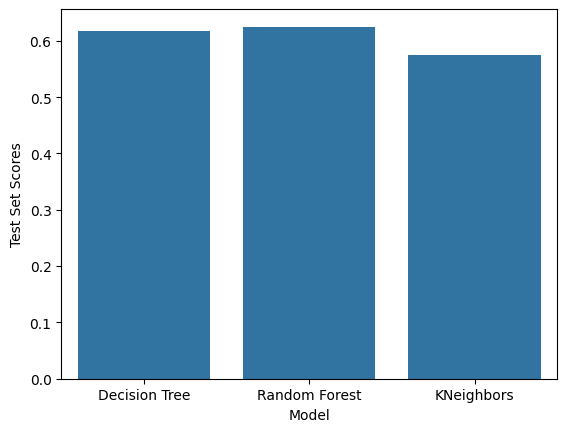

In [77]:
sns.barplot(data=score_comparison, x='Model', y='Test Set Scores');

## Final Model

In [78]:
final_model = DecisionTreeClassifier(
    min_samples_split=10,
    min_samples_leaf=25,
    max_leaf_nodes=12,
    max_depth=15
)

final_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=12, min_samples_leaf=25,
                       min_samples_split=10)

In [79]:
pred_y = final_model.predict(test_X)

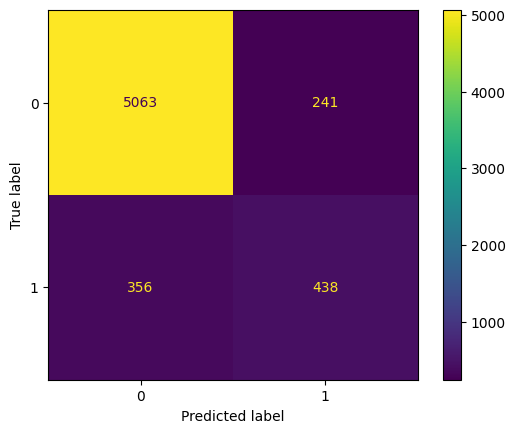

In [80]:
matrix = confusion_matrix(test_y, pred_y)
display = ConfusionMatrixDisplay(matrix)
display.plot();